# K Nearest Neibour classification algorithm

In [224]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

dataset = pd.read_csv('train.csv')
dataset = dataset.drop(['Name','Ticket','Cabin'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [225]:
dataset.drop_duplicates()
dataset.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,887,0,2,male,27.0,0,0,13.0000,S
885,888,1,1,female,19.0,0,0,30.0000,S
886,889,0,3,female,45.0,1,2,23.4500,S
887,890,1,1,male,26.0,0,0,30.0000,C


In [226]:
le = preprocessing.LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset['Embarked'] = le.fit_transform(dataset['Embarked'])

In [238]:
from sklearn import neighbors

In [281]:
def diagsum(mat): 
    sh = np.shape(mat)
    n = sh[0]
    principal = 0
    for i in range(0, n):  
        for j in range(0, n):  
            if (i == j): 
                principal += mat[i][j] 
    return principal

In [282]:
def knn_alogrithm(dependent_var):
    y = dataset[dependent_var]
    X = dataset.drop([dependent_var,'PassengerId'],axis=1)
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    k_val = []
    acc_score = []
    n = y_test.size
    for i in range(1,n):
        k_val.append(i)
        knn = neighbors.KNeighborsClassifier(n_neighbors=i)
        acc = knn.fit(x_train,y_train).score(x_test,y_test)
        acc_score.append(acc)
        y_pred = knn.predict(x_test)
        c_mat = confusion_matrix(y_test,y_pred)
        if acc == max(acc_score):
            print("**********MAXIMUM ACCURACY SCORED ITERATION***************")
            print("K value =",i,"\n Confusion Matrix:\n",c_mat)
            print("Here, Out of",n,"records, ",diagsum(c_mat),"records are correctly classified!\n and accuracy score is",acc,"\n")
    plt.plot(k_val,acc_score)
    plt.xlabel("K Value")
    plt.ylabel("Accuracy Score")
    plt.show()

# KNN: Dependent variable = Passenger Class

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 1 
 Confusion Matrix:
 [[40  6  1]
 [ 3 27  5]
 [ 1  7 88]]
Here, Out of 178 records,  155 records are correctly classified!
 and accuracy score is 0.8707865168539326 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 3 
 Confusion Matrix:
 [[41  6  0]
 [ 4 26  5]
 [ 5  2 89]]
Here, Out of 178 records,  156 records are correctly classified!
 and accuracy score is 0.8764044943820225 



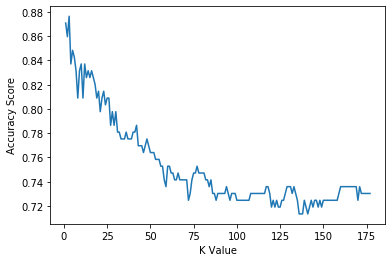

In [283]:
knn_alogrithm('Pclass')

### At 1st and 3rd iteration the accuracy score value is 87.6% reached the maximum value. 



### K value = 3 is Best for the classification model.

# KNN: Dependent variable = Survived Passengers

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 1 
 Confusion Matrix:
 [[83 22]
 [35 38]]
Here, Out of 178 records,  121 records are correctly classified!
 and accuracy score is 0.6797752808988764 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 5 
 Confusion Matrix:
 [[80 25]
 [31 42]]
Here, Out of 178 records,  122 records are correctly classified!
 and accuracy score is 0.6853932584269663 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 6 
 Confusion Matrix:
 [[86 19]
 [37 36]]
Here, Out of 178 records,  122 records are correctly classified!
 and accuracy score is 0.6853932584269663 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 7 
 Confusion Matrix:
 [[82 23]
 [31 42]]
Here, Out of 178 records,  124 records are correctly classified!
 and accuracy score is 0.6966292134831461 



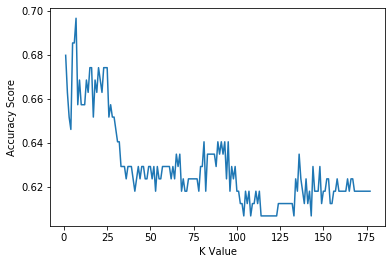

In [284]:
knn_alogrithm('Survived')

### K value = 7 is Best classification model  based on Survived Column. 
### maximun accuracy score value is 69.6%

# KNN: Dependent variable = Gender

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 1 
 Confusion Matrix:
 [[35 28]
 [29 86]]
Here, Out of 178 records,  121 records are correctly classified!
 and accuracy score is 0.6797752808988764 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 5 
 Confusion Matrix:
 [[32 31]
 [25 90]]
Here, Out of 178 records,  122 records are correctly classified!
 and accuracy score is 0.6853932584269663 



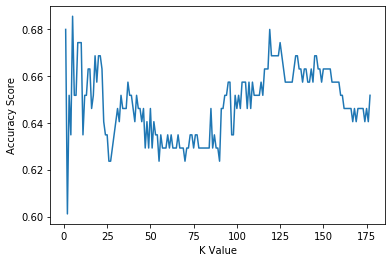

In [285]:
knn_alogrithm('Sex')

### K value = 5 is Best classification model based on Sex Column.
### maximun accuracy score value is 68.5%

# KNN: Dependent variable = Embarked

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 1 
 Confusion Matrix:
 [[ 17   1  12]
 [  0   4  12]
 [ 15   7 110]]
Here, Out of 178 records,  131 records are correctly classified!
 and accuracy score is 0.7359550561797753 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 5 
 Confusion Matrix:
 [[ 12   3  15]
 [  0   4  12]
 [ 11   2 119]]
Here, Out of 178 records,  135 records are correctly classified!
 and accuracy score is 0.7584269662921348 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 45 
 Confusion Matrix:
 [[  5   1  24]
 [  0   4  12]
 [  6   0 126]]
Here, Out of 178 records,  135 records are correctly classified!
 and accuracy score is 0.7584269662921348 



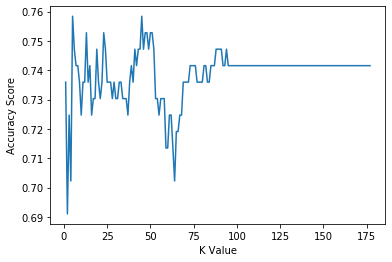

In [286]:
knn_alogrithm('Embarked')

### K value = 45 is Best classification model based on Embarked Column.
### maximun accuracy score value is 75.8%

# KNN: Dependent variable = Parch

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 1 
 Confusion Matrix:
 [[121   7   5   0   0   0]
 [ 13   7   2   0   0   1]
 [  4   8   8   0   0   0]
 [  0   0   1   0   0   0]
 [  1   0   0   0   0   0]
 [  0   0   0   0   0   0]]
Here, Out of 178 records,  136 records are correctly classified!
 and accuracy score is 0.7640449438202247 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 2 
 Confusion Matrix:
 [[131   2   0   0   0]
 [ 16   7   0   0   0]
 [ 11   4   5   0   0]
 [  1   0   0   0   0]
 [  1   0   0   0   0]]
Here, Out of 178 records,  143 records are correctly classified!
 and accuracy score is 0.8033707865168539 



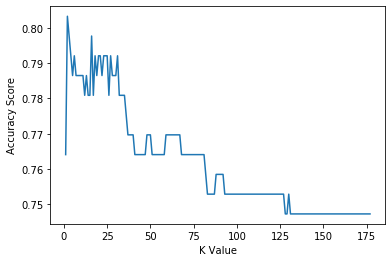

In [287]:
knn_alogrithm('Parch')

### K value = 2 is Best classification model based on Parch Column.
### maximun accuracy score value is 80.3%

# KNN: Dependent variable = SibSp

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 1 
 Confusion Matrix:
 [[112  11   0   0   1   0   0]
 [ 16  21   3   0   0   0   0]
 [  3   0   1   0   0   0   0]
 [  0   1   1   2   2   0   0]
 [  0   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]
Here, Out of 178 records,  140 records are correctly classified!
 and accuracy score is 0.7865168539325843 

**********MAXIMUM ACCURACY SCORED ITERATION***************
K value = 3 
 Confusion Matrix:
 [[109  14   0   0   1   0   0]
 [ 15  25   0   0   0   0   0]
 [  3   1   0   0   0   0   0]
 [  0   2   1   2   1   0   0]
 [  0   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]
Here, Out of 178 records,  140 records are correctly classified!
 and accuracy score is 0.7865168539325843 



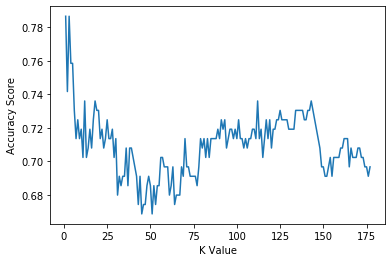

In [288]:
knn_alogrithm('SibSp')

### K value = 3 is Best classification model based on SibSp Column.
### maximun accuracy score value is 78.65%